In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt


In [31]:
data = pd.read_csv("./btc_usd_86400.csv")
data

,Time UTC,Open,High,Low,Close,Volume,Trades
0,2020-04-24T05:00:00.000Z,7499.99,7548.65,3800.00,7509.50,5.669463,254
1,2020-04-25T05:00:00.000Z,7509.50,7665.49,7501.48,7557.95,4.455276,128
2,2020-04-26T05:00:00.000Z,7540.43,7769.86,7502.53,7736.99,3.953988,126
3,2020-04-27T05:00:00.000Z,7623.07,7783.42,7623.07,7686.03,5.562351,131
4,2020-04-28T05:00:00.000Z,7693.69,7858.61,7693.69,7835.55,5.034493,112
...,...,...,...,...,...,...,...
550,2021-10-26T05:00:00.000Z,62542.92,63074.01,59900.00,61212.01,49.816026,4534
551,2021-10-27T05:00:00.000Z,61217.35,61425.38,58200.01,58799.36,478.075321,4749
552,2021-10-28T05:00:00.000Z,58897.48,62291.66,58001.04,61563.44,50.981594,4540
553,2021-10-29T05:00:00.000Z,61548.86,62900.00,60384.52,61468.90,21.449723,4109


In [32]:
data['Open'] = data['Open'].apply(np.log)
data['High'] = data['High'].apply(np.log)
data['Low'] = data['Low'].apply(np.log)
data['Close'] = data['Close'].apply(np.log)

data['H_O'] = (data['High'] - data['Open'])
data['C_O'] = (data['Close'] - data['Open'])
data['C_L'] = (data['Close'] - data['Low'])
data['H_L'] = (data['High'] - data['Low'])

data['Volume'] = data['Volume']

# data['Close1'] = data['Close'].shift(1)
# data['Close2'] = data['Close'].shift(2)
# data['Close3'] = data['Close'].shift(3)
# data['Close4'] = data['Close'].shift(4)
# data['Close5'] = data['Close'].shift(5)

data['vol1'] = data['Volume'].shift(1)
data['vol2'] = data['Volume'].shift(2)
data['vol3'] = data['Volume'].shift(3)
data['vol4'] = data['Volume'].shift(4)
data['vol5'] = data['Volume'].shift(5)

data['vol1'] = data['Volume']/data['vol1']
data['vol2'] = data['Volume']/data['vol2']
data['vol3'] = data['Volume']/data['vol3']
data['vol4'] = data['Volume']/data['vol4']
data['vol5'] = data['Volume']/data['vol5']

data['C_O1'] = data['C_O'].shift(1)
data['C_O2'] = data['C_O'].shift(2)
data['C_O3'] = data['C_O'].shift(3)
data['C_O4'] = data['C_O'].shift(4)
data['C_O5'] = data['C_O'].shift(5)

data['is_Long'] = [1 if r > 0 else 0 for r in data['C_O']]
data['is_Long'] = data['is_Long'].shift(-1)
data.dropna(inplace=True)
#data = data.drop(columns=['Time UTC', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades'])
data = data.drop(columns=['Time UTC', 'Volume', 'Trades'])
data

,Open,High,Low,Close,H_O,C_O,C_L,H_L,vol1,vol2,vol3,vol4,vol5,C_O1,C_O2,C_O3,C_O4,C_O5,is_Long
5,8.966428,9.137511,8.966428,9.123474,0.171083,0.157047,0.157047,0.171083,9.476480,8.577179,12.066116,10.708489,8.415132,0.018271,0.008225,0.025734,0.006431,0.001267,0.0
6,9.123474,9.159046,9.035987,9.082406,0.035572,-0.041069,0.046419,0.123059,0.989911,9.380874,8.490646,11.944385,10.600454,0.157047,0.018271,0.008225,0.025734,0.006431,1.0
7,9.081035,9.109414,9.069936,9.085440,0.028379,0.004405,0.015504,0.039478,0.597652,0.591622,5.606498,5.074451,7.138585,-0.041069,0.157047,0.018271,0.008225,0.025734,1.0
8,9.084337,9.124766,9.083584,9.118590,0.040429,0.034253,0.035006,0.041182,0.511957,0.305972,0.302885,2.870285,2.597900,0.004405,-0.041069,0.157047,0.018271,0.008225,0.0
9,9.118343,9.119409,9.064814,9.070615,0.001065,-0.047729,0.005801,0.054595,1.319245,0.675397,0.403652,0.399580,3.786610,0.034253,0.004405,-0.041069,0.157047,0.018271,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,11.036501,11.062558,11.032205,11.041825,0.026057,0.005324,0.009620,0.030353,1.129016,1.986101,0.533912,0.306794,0.459271,0.017693,-0.003309,-0.029852,-0.030064,0.016109,0.0
550,11.043608,11.052064,11.000432,11.022099,0.008456,-0.021510,0.021667,0.051632,1.679491,1.896172,3.335639,0.896700,0.515258,0.005324,0.017693,-0.003309,-0.029852,-0.030064,0.0
551,11.022186,11.025578,10.971641,10.981886,0.003392,-0.040300,0.010245,0.053938,9.596818,16.117771,18.197217,32.011517,8.605466,-0.021510,0.005324,0.017693,-0.003309,-0.029852,1.0
552,10.983554,11.039583,10.968216,11.027823,0.056029,0.044270,0.059607,0.071367,0.106639,1.023397,1.718787,1.940538,3.413684,-0.040300,-0.021510,0.005324,0.017693,-0.003309,0.0


In [33]:
train_size = int(data.shape[0]*0.8)
train_set = data.iloc[:train_size, :]
test_set = data.iloc[train_size:, :]

In [106]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()

        # Fully Connected Layer 1
        self.layer1 = nn.Linear(18, 32)
        # Fully Connected Layer 2
        self.layer2 = nn.Linear(32, 16)
        # Fully Connected Layer 3
        self.layer3 = nn.Linear(16, 8)
        # Fully Connected Layer 4
        self.layer4 = nn.Linear(8, 4)
        # Fully Connected Layer 5
        self.layer5 = nn.Linear(4, 2)
        # self.lstm = nn.LSTM(input_size, hidden_size, num_layers) # utilize the LSTM model in torch.nn 
        # self.forwardCalculation = nn.Linear(hidden_size, output_size)
 
    def forward(self, input_data):
        z1_ = self.layer1(input_data)
        z1 = torch.sigmoid(z1_)
        
        z2_ = self.layer2(z1)
        z2 = torch.sigmoid(z2_)

        z3_ = self.layer3(z2)
        z3 = torch.sigmoid(z3_)

        z4_ = self.layer4(z3)
        z4 = torch.sigmoid(z4_)

        z5_ = self.layer5(z4)
        return z5_

In [107]:
X = train_set.iloc[:, 0:18]
y = train_set.iloc[:, 18]
X = np.array(X)
y = np.array(y)

In [108]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)
X.shape

torch.Size([439, 18])

In [109]:
dnn_model = DNN()
optimizer = torch.optim.Adam(dnn_model.parameters(), lr=1e-3)
loss_function = nn.CrossEntropyLoss()
print('DNN model:', dnn_model)
print('model.parameters:', dnn_model.parameters)
def dynamic_lr(optimizer, epoch, alpha=1e-3):
    if epoch <= 1000:
        lr = alpha
    else:
        lr = alpha / (1 + 0.0008*(epoch - 100))
    for pg in optimizer.param_groups:
        pg['lr'] = lr

LSTM model: DNN(
  (layer1): Linear(in_features=18, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=4, bias=True)
  (layer5): Linear(in_features=4, out_features=2, bias=True)
)
model.parameters: <bound method Module.parameters of DNN(
  (layer1): Linear(in_features=18, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=4, bias=True)
  (layer5): Linear(in_features=4, out_features=2, bias=True)
)>


In [110]:
iter_times = 100000
loss_list = []
print(X.shape)
for i in range(iter_times):
    output = dnn_model.forward(X)
    loss = loss_function(output, y)
 
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    dynamic_lr(optimizer, i)
    loss_list.append(loss)
    
    if loss.item() < 0.01:
        print('Epoch [{}/{}], Loss: {:.5f}'.format(i+1, iter_times, loss.item()))
        print("The loss value is reached")
        break
    elif (i + 1) % 500 == 0:
        print('Epoch: [{}/{}], Loss:{:.5f}'.format(i+1, iter_times, loss.item()))

torch.Size([439, 18])
Epoch: [500/100000], Loss:0.66678
Epoch: [1000/100000], Loss:0.61100
Epoch: [1500/100000], Loss:0.54969
Epoch: [2000/100000], Loss:0.50222
Epoch: [2500/100000], Loss:0.46467
Epoch: [3000/100000], Loss:0.44151
Epoch: [3500/100000], Loss:0.42294
Epoch: [4000/100000], Loss:0.40868
Epoch: [4500/100000], Loss:0.39328
Epoch: [5000/100000], Loss:0.38391
Epoch: [5500/100000], Loss:0.37596
Epoch: [6000/100000], Loss:0.36852
Epoch: [6500/100000], Loss:0.36163
Epoch: [7000/100000], Loss:0.35540
Epoch: [7500/100000], Loss:0.34973
Epoch: [8000/100000], Loss:0.34448
Epoch: [8500/100000], Loss:0.33955
Epoch: [9000/100000], Loss:0.33503
Epoch: [9500/100000], Loss:0.33044
Epoch: [10000/100000], Loss:0.32473
Epoch: [10500/100000], Loss:0.31683
Epoch: [11000/100000], Loss:0.30727
Epoch: [11500/100000], Loss:0.29856
Epoch: [12000/100000], Loss:0.29036
Epoch: [12500/100000], Loss:0.28158
Epoch: [13000/100000], Loss:0.27187
Epoch: [13500/100000], Loss:0.26315
Epoch: [14000/100000], Los

In [111]:
tX = test_set.iloc[:, 0:18]
ty = test_set.iloc[:, 18]
tX = np.array(tX)
ty = np.array(ty)
tX = torch.FloatTensor(tX)
ty = torch.LongTensor(ty)

In [113]:
from sklearn.metrics import accuracy_score
pred = []
prob = nn.Softmax(dim = 1)
p = prob(dnn_model.forward(X)).detach().numpy()

for i in range(p.shape[0]):
    # if np.max(p[i, :]) >= 0.9:
    #     pred.append(np.argmax(p[i, :]))
    # # elif np.max(p[i, :]) <= 0.05:
    # #     pred.append(np.argmax(p[i, :]))
    # else:
    #     pred.append(np.nan)
    pred.append(np.argmax(p[i, :]))
    
pred = np.array(pred)
accuracy_score(pred, y)

0.9430523917995444

In [118]:
dnn2 = torch.load('dnn.mdl')

In [119]:
pred = []
prob = nn.Softmax(dim = 1)
p = prob(dnn2.forward(tX)).detach().numpy()

for i in range(p.shape[0]):
    if np.max(p[i, 1]) >= 0.95:
        pred.append(1)
    else:
        pred.append(np.nan)
    #pred.append(np.argmax(p[i, :]))
    
pred = np.array(pred)
#accuracy_score(pred, y)

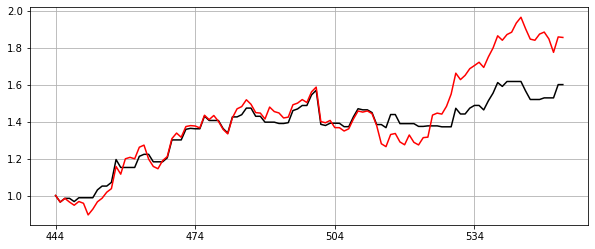

In [120]:
btc = np.exp(test_set['Close'])
btc = np.array(btc)
pred = 2 * pred - 1

temp = 1.0
ctn = []
ctn.append(temp)

for i in range(pred.shape[0] - 1):
    if pred[i] == 1 or pred[i] == -1:
        temp = temp * (1.0 + ((btc[i + 1] - btc[i])/btc[i]) * pred[i])
    else:
        temp = temp
    ctn.append(temp)

plt.figure(figsize=(10,4))
plt.plot(test_set.index, ctn, color = 'black')
plt.plot(test_set.index, btc/btc[0], color = 'red')
plt.xticks(test_set.index[::30])
plt.grid()

plt.show()

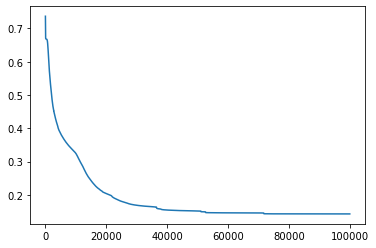

In [132]:
plt.plot(np.arange(100000), [i.detach().numpy() for i in loss_list])
plt.show()